**IMPORT ALL NECESSARY PACKAGES**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

**Read the csv file**

In [2]:
df = pd.read_csv("Trip Duration_Master.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name
0,id1080784,2,29/2/2016 16:40,29/2/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1
1,id0889885,1,11/3/2016 23:35,11/3/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,5
2,id0857912,2,21/2/2016 17:59,21/2/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7
3,id3744273,2,5/1/2016 9:44,5/1/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2
4,id0232939,1,17/2/2016 6:42,17/2/2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
 11  day_name            729322 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 66.8+ MB


#Pick up date and time should be converted to compatible data type

In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_name
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,4.049081
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.954470
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,2.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,4.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,6.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,7.000000


**Insights**
#Maximum passenger count = 9 but 1 or 2 passengers mostly travel
#Trip duration varies from 1 sec to a whooping 539 hrs, there must be outliers present
#Vendor 2 seems to have provided more rides

**FUNCTION DEFINATIONS**

In [6]:
from math import radians, cos, sin, asin, sqrt
def get_distance(df):
    lt1, ln1, lt2, ln2 = df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude 
    R = 6732.8 
    dLt = radians(lt2 - lt1)
    dLn = radians(ln2 - ln1)
    lt1 = radians(lt1)
    lt2 = radians(lt2)
    a = sin(dLt/2)**2 + cos(lt1)*cos(lt2)*sin(dLn/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [10]:
def car_model(df):
    car = df.passenger_count
    if (car<=4):
        t=1
    else:
        t=0
    return t

**NEW COLUMN ADDITIONS**

In [7]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['month'] = df.pickup_datetime.dt.month
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['trip_duration_hours'] = df['trip_duration']/3600
df['distance'] = df.apply(lambda x: get_distance(x), axis = 1)
df['speed']=df['distance']/df['trip_duration_hours']

In [11]:
df['car_type'] = df.apply(lambda x: car_model(x), axis = 1)

**Univariate Analysis**

In [12]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_name,month,pickup_hour,dropoff_hour,trip_duration_hours,distance,speed,car_type
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,4.049081,4.725009,13.611698,13.60616,0.264508,3.636556,15.240422,0.913570
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.954470,2.944943,6.402853,6.48637,1.073507,4.600340,13.041856,0.280998
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,1.000000,0.000000,0.00000,0.000278,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,2.000000,2.000000,9.000000,9.00000,0.110278,1.302698,9.642462,1.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,4.000000,4.000000,14.000000,14.00000,0.184167,2.214683,13.523542,1.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,6.000000,6.000000,19.000000,19.00000,0.298611,4.096621,18.857246,1.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,7.000000,12.000000,23.000000,23.00000,538.815556,1311.378109,5960.809588,1.000000


 **Checking for Outliers**


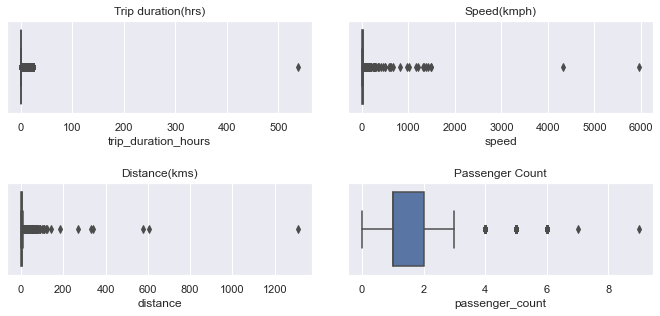

In [17]:
figure,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
sns.boxplot(df.trip_duration_hours,ax=ax[0][0])
sns.boxplot(df.speed,ax=ax[0][1])
sns.boxplot(df.distance,ax=ax[1][0])
sns.boxplot(df.passenger_count,ax=ax[1][1])
figure.tight_layout(pad=3.0)
ax[0][0].set_title('Trip duration(hrs)')
ax[0][1].set_title('Speed(kmph)')
ax[1][0].set_title('Distance(kms)')
ax[1][1].set_title('Passenger Count')
plt.show()

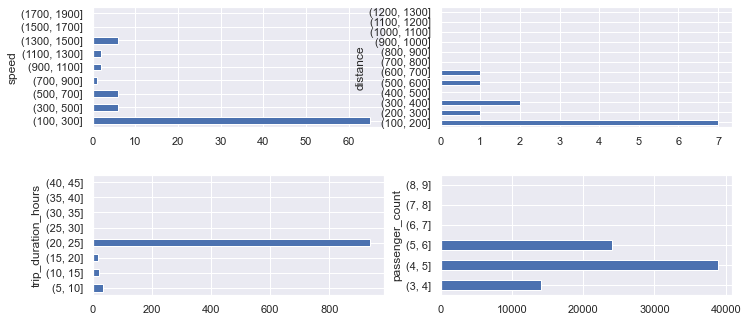

In [31]:
figure,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
figure.tight_layout(pad=2.0)
df.speed.groupby(pd.cut(df.speed, np.arange(100,2000,200))).count().plot(kind='barh',ax=ax[0][0])
df.distance.groupby(pd.cut(df.distance, np.arange(100,1400,100))).count().plot(kind='barh',ax=ax[0][1])
df.trip_duration_hours.groupby(pd.cut(df.trip_duration_hours, np.arange(5,50,5))).count().plot(kind='barh',ax=ax[1][0])
df.passenger_count.groupby(pd.cut(df.passenger_count, np.arange(3,10,1))).count().plot(kind='barh',ax=ax[1][1])
plt.show()

In [27]:
ax=df.trip_duration_hours.groupby(pd.cut(df.trip_duration_hours, np.arange(0,50,5))).count()
print(ax)

trip_duration_hours
(0, 5]      728308
(5, 10]         36
(10, 15]        22
(15, 20]        17
(20, 25]       938
(25, 30]         0
(30, 35]         0
(35, 40]         0
(40, 45]         0
Name: trip_duration_hours, dtype: int64


In [33]:
n = len(pd.unique(df['trip_duration']))
print(n)
trip_count = df.groupby('trip_duration').size()
print(trip_count)

6296
trip_duration
1           13
2          102
3          163
4          139
5          136
          ... 
86377        1
86378        1
86387        1
86391        1
1939736      1
Length: 6296, dtype: int64


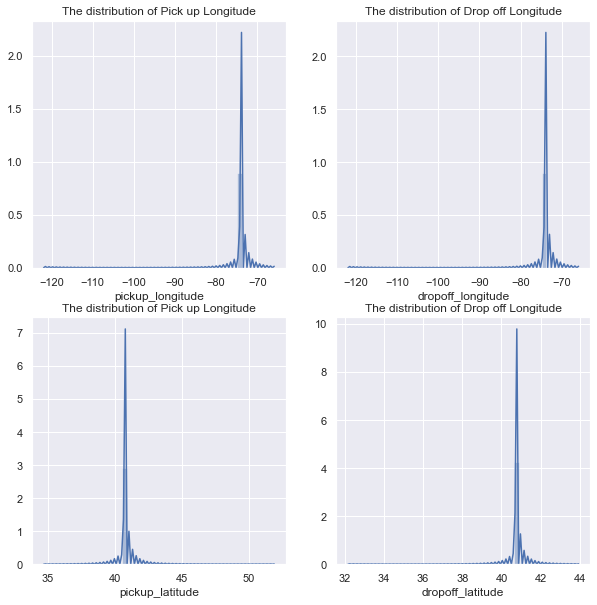

In [32]:
figure,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.distplot(df['pickup_longitude'],ax=ax[0][0])
ax[0][0].set_title('The distribution of Pick up Longitude')
sns.distplot(df['dropoff_longitude'], ax=ax[0][1])
ax[0][1].set_title('The distribution of Drop off Longitude')
sns.distplot(df['pickup_latitude'],ax=ax[1][0])
ax[1][0].set_title('The distribution of Pick up Longitude')
sns.distplot(df['dropoff_latitude'], ax=ax[1][1])
ax[1][1].set_title('The distribution of Drop off Longitude')
plt.show()

**Inferences from the Analysis**
#Trip duration has a big outlier
#Mean trip duration is 0.26 hours
#Most pickups during Noon
#Mean dist = 3.63 kms
#max dist is 11311.378 kms this needs treartment too
#mean speed = 15.24 kmph
#Max speed seems absurd need to check for outliers
#Passenger count mostly 1/2
#Most trips trips during thurs/fri days
#Trips with zero speed need treatment
#Trips with zero distance need treatment
#Fewer trips with distamces more than 200 kms
#Speed duration seems absurd needs correction

#Converted the data type of date and time columns

 **Passenger_Count vs Trips**
 #customer_count = df.groupby("passenger_count").size()
no_of_passengers = df.passenger_count.unique()
no_of_passengers.sort()
plt.bar(no_of_passengers,customer_count)
plt.title("No of passenger Distribution")
print(customer_count)

passenger_count
0        33
1    517415
2    105097
3     29692
4     14050
5     38926
6     24107
7         1
9         1
dtype: int64


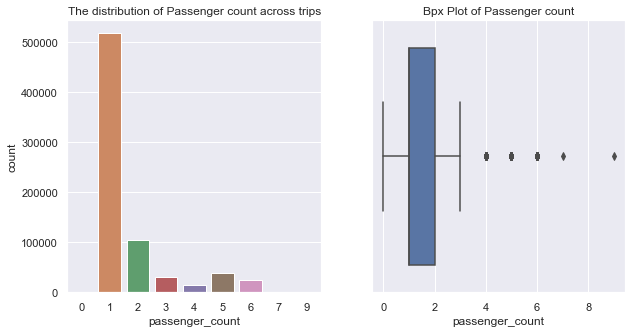

In [62]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='passenger_count', data = df,ax=ax[0])
sns.boxplot(df.passenger_count,ax=ax[1])
ax[0].set_title('The distribution of Passenger count across trips')
ax[1].set_title('Bpx Plot of Passenger count')
customer_count = df.groupby("passenger_count").size()
no_of_passengers = df.passenger_count.unique()
print(customer_count)
plt.show()

In [63]:
df.passenger_count.describe()

count    729322.000000
mean          1.662055
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

**Inference**
#Replace the values with zero customers with mean value or remove them

 **Day vs Trip counts**
 #ALT CODE
 #day_count = df.groupby("day_name").size()
print(day_count)
name_of_days=df.day_name.unique()
name_of_days.sort()
sns.barplot(name_of_days,day_count)

day_name
1     93972
2    101254
3    105074
4    109344
5    111744
6    110252
7     97682
dtype: int64


Text(0.5, 1.0, 'Month wise distribution')

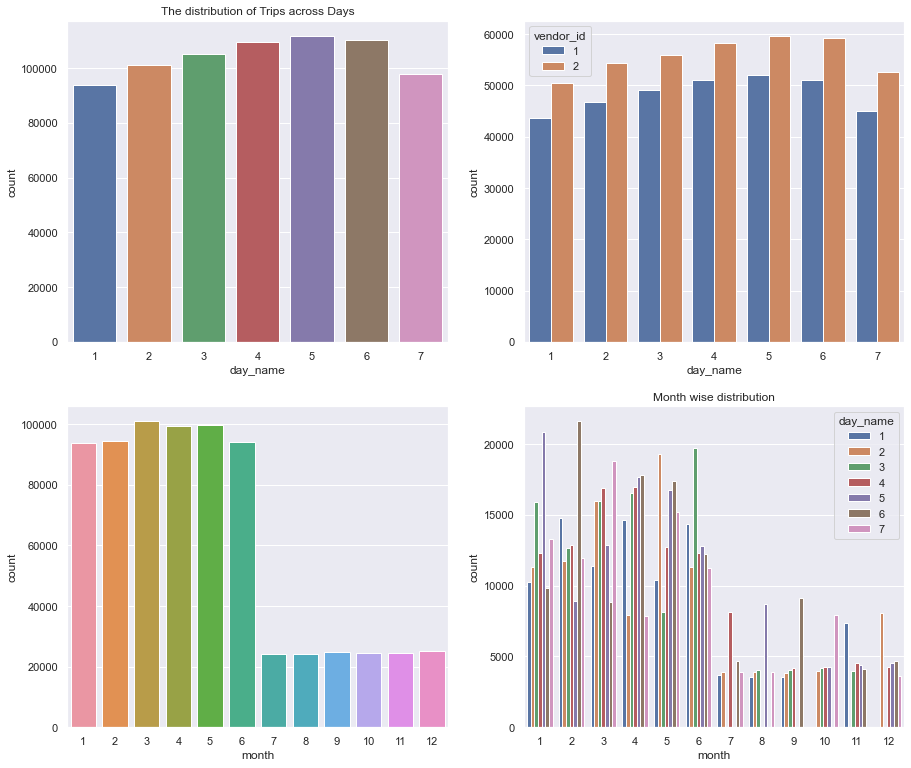

In [78]:
day_count = df.groupby("day_name").size()
print(day_count)
figure,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,13))
sns.countplot(x='day_name', data = df, ax=ax[0][0])
sns.countplot(x='day_name', data = df, ax=ax[0][1], hue = 'vendor_id')
sns.countplot(x='month', data = df, ax=ax[1][0])
sns.countplot(x='month', data = df, ax=ax[1][1], hue = 'day_name')
ax[0][0].set_title('The distribution of Trips across Days')
ax[1][1].set_title('Month wise distribution')


 **Pick up hours vs Trips**
 #hour_count = df.groupby(pickup_hour).size()
print(hour_count)
pickup_hour.hist(bins=24)
plt.show()

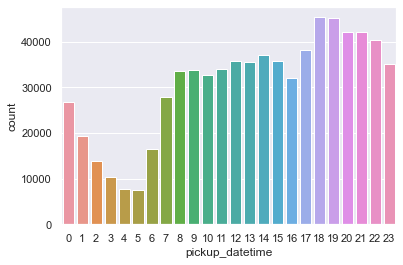

In [114]:
sns.countplot(df.pickup_hour)
plt.show()

 **Outliers in Trip Duration**

In [14]:
n = len(pd.unique(df['trip_duration']))
print(n)
trip_count = df.groupby('trip_duration').size()
print(trip_count)

6296
trip_duration
1           13
2          102
3          163
4          139
5          136
          ... 
86377        1
86378        1
86387        1
86391        1
1939736      1
Length: 6296, dtype: int64


**Inference**
#The largest time is way larger han the second largest time and causes skewness in data that can be seen in box plot
#This data can be removed while transforming the data

vendor_id
1    338841
2    390481
dtype: int64


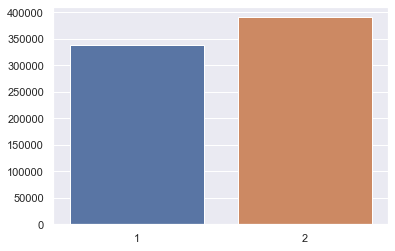

In [43]:
vendor_count = df.groupby('vendor_id').size()
id_of_vendor = df.vendor_id.unique()
id_of_vendor.sort()
print(vendor_count)
sns.barplot(id_of_vendor,vendor_count)
plt.show()

**TRIP DURATION ANALYSIS**

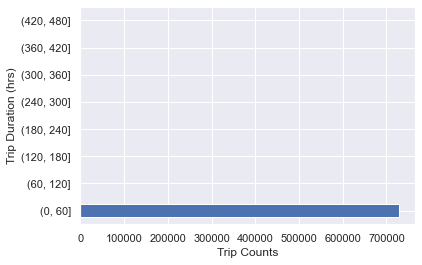

In [93]:
df['trip_duration_hours'].describe()
df.trip_duration_hours.groupby(pd.cut(df.trip_duration_hours, np.arange(0,540,60))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (hrs)')
plt.show()

**Trip duration per month**

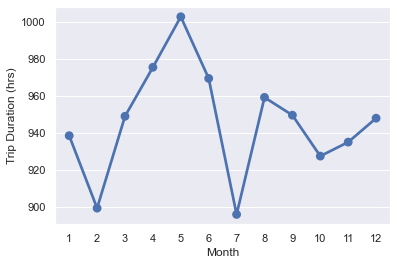

In [132]:
group_month_duration = df.groupby('month').trip_duration.mean()
sns.pointplot(group_month_duration.index, group_month_duration.values)
plt.ylabel('Trip Duration (hrs)')
plt.xlabel('Month')
plt.show()

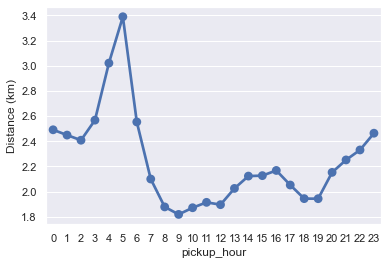

In [99]:
group_dist_hour = df.groupby('pickup_hour').distance.mean()
sns.pointplot(group_dist_hour.index, group_dist_hour.values)
plt.ylabel('Distance (km)')
plt.show()

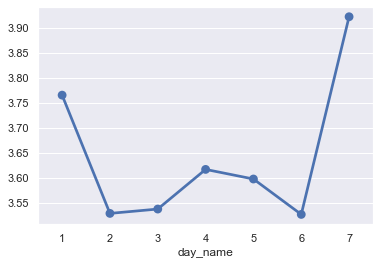

In [133]:
group_dist_weekday = df.groupby('day_name').distance.mean()
group_duration_weekday = df.groupby('day_name').trip_duration_hours.mean()
sns.pointplot(group_dist_weekday.index, group_dist_weekday.values)
plt.show()

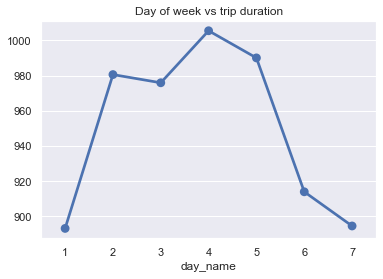

In [126]:
sns.pointplot(group_duration_weekday.index, group_duration_weekday.values)
plt.title("Day of week vs trip duration")
plt.show()

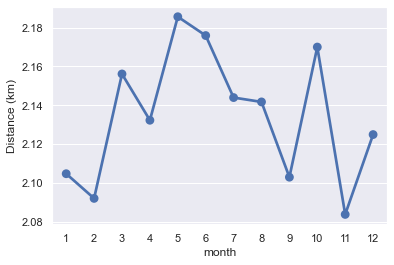

In [101]:
group_dist_mnt = df.groupby('month').distance.mean()
sns.pointplot(group_dist_mnt.index, group_dist_mnt.values)
plt.ylabel('Distance (km)')
plt.show()

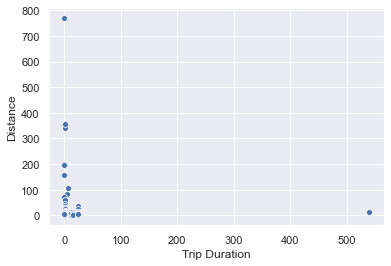

In [112]:
sns.scatterplot(data=df, x ='trip_duration_hours', y = 'distance')
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

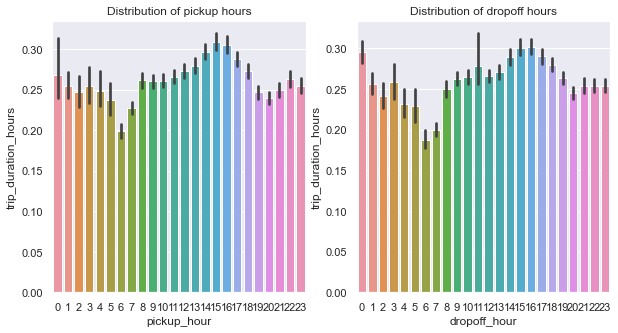

In [118]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].set_title('Distribution of pickup hours')
sns.barplot(x="pickup_hour", y="trip_duration_hours",data=df,ax=ax[0])
ax[1].set_title('Distribution of dropoff hours')
sns.barplot(x="dropoff_hour", y="trip_duration_hours",data=df,ax=ax[1])
plt.show()

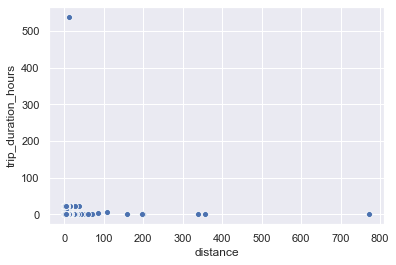

In [129]:
sns.scatterplot(x='distance',y='trip_duration_hours',data=df)